In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("kidney.csv")

In [4]:
data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.shape

(400, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
cols_names = {"bp": "blood_pressure",
              "sg": "specific_gravity",
              "al": "albumin",
              "su": "sugar",
              "rbc": "red_blood_cells",
              "pc": "pus_cell",
              "pcc": "pus_cell_clumps",
              "ba": "bacteria",
              "bgr": "blood_glucose_random",
              "bu": "blood_urea",
              "sc": "serum_creatinine",
              "sod": "sodium",
              "pot": "potassium",
              "hemo": "haemoglobin",
              "pcv": "packed_cell_volume",
              "wc": "white_blood_cell_count",
              "rc": "red_blood_cell_count",
              "htn": "hypertension",
              "dm": "diabetes_mellitus",
              "cad": "coronary_artery_disease",
              "appet": "appetite",
              "pe": "pedal_edema",
              "ane": "anemia",
              "classification":"Chronic_disease"}

data.rename(columns=cols_names, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [10]:
# Change to Numerical Dtyp
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')

# Drop id Column as it is seems to be an unique identifier for each row
data.drop(["id"], axis=1, inplace=True)

In [11]:
# Extracting categorical and numerical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [12]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

Chronic_disease has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

In [15]:
data=data[data['Chronic_disease']!='ckd\t']

In [16]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            46
albumin                     45
sugar                       48
red_blood_cells            151
pus_cell                    64
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 51
packed_cell_volume          70
white_blood_cell_count     106
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
Chronic_disease              0
dtype: int64

In [17]:
data[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           46
albumin                    45
sugar                      48
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                51
packed_cell_volume         70
white_blood_cell_count    106
red_blood_cell_count      130
dtype: int64

In [18]:
data[cat_cols].isnull().sum()

red_blood_cells            151
pus_cell                    64
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
Chronic_disease              0
dtype: int64

In [19]:
def impute_mean(feature):
    mean_value=data[feature].mean()
    data[feature].fillna(value=mean_value, inplace=True)
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [20]:
for col in num_cols:
    impute_mean(col)
    
    
data[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
for col in cat_cols:
    impute_mode(col)
    
    
data[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
Chronic_disease            0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

<AxesSubplot:xlabel='anemia', ylabel='count'>

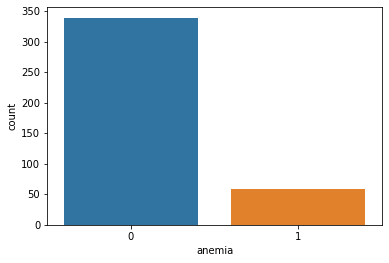

In [23]:
sn.countplot(x=data.anemia)

In [25]:
y=data.pop('anemia')
x=data
x_copy=x

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
key = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','GaussianNB']
value = [LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),GaussianNB()]
models = dict(zip(key,value))
print(models)

{'LogisticRegression': LogisticRegression(), 'SVC': SVC(), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'KNeighborsClassifier': KNeighborsClassifier(), 'GaussianNB': GaussianNB()}


In [30]:
predicted =[]
from sklearn.metrics import classification_report
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
    print(classification_report(y_test, predict))

LogisticRegression 0.875
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        68
           1       0.56      0.75      0.64        12

    accuracy                           0.88        80
   macro avg       0.76      0.82      0.78        80
weighted avg       0.89      0.88      0.88        80

SVC 0.8875
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        68
           1       0.71      0.42      0.53        12

    accuracy                           0.89        80
   macro avg       0.81      0.69      0.73        80
weighted avg       0.88      0.89      0.87        80

DecisionTreeClassifier 0.85
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        68
           1       0.50      0.58      0.54        12

    accuracy                           0.85        80
   macro avg       0.71      0.74      0.72        80
weighted a

<AxesSubplot:>

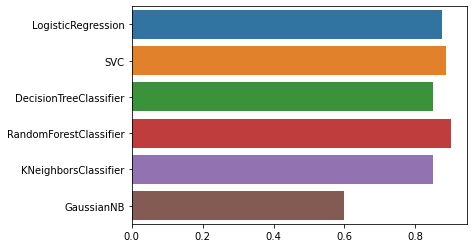

In [31]:
sn.barplot(x=predicted, y=key)

In [32]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

<AxesSubplot:>

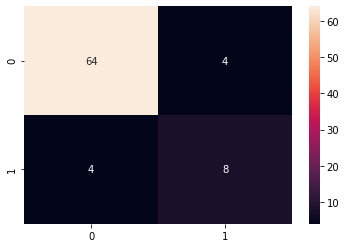

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)

In [34]:
from sklearn.pipeline import Pipeline
sc=StandardScaler()
sc.fit(x_copy)
model_pipe=Pipeline([("scaler", sc),
                    ("model", RandomForestClassifier())])

model_pipe.fit(x_copy,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [35]:
import joblib

In [36]:
joblib.dump(model_pipe,"Anemia_Predictor.pkl")

['Anemia_Predictor.pkl']